# Project: Investigate No_show Dataset 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. A number of characteristics about the patient are included in each row.
1. 'ScheduledDay' tells us on what day the patient set up their appointment.
2. 'Neighborhood' indicates the location of the hospital.
3. 'Scholarship' indicates whether or not the patient is enrolled in Brasilian welfare program Bolsa Família.
4. Other columns are self explanatory.
4. MOST IMPORTANT: about the encoding of the last column: it says 'No' if the patient showed up to their appointment, and 'Yes' if they did not show up.


## Questions to be analyzed

1. Out of 100k medical appointmemts, how many number of patients showed up for the scheduled day?
2. How many of them having/not having the scholorship showed up for the appointment?
3. How many patients showed up with respect to the gender?
4. Top neighbourhood patients who showed up for the appointment?
5. What is the age group of people who showed up for the appointment?
6. Who( male or females) are in more numbers with respect to the age group?
7. Final Conclusion: From all the analysis done, I want to see who (male or females) visited 

In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

In [51]:
# Load your data and print out a few lines. Perform operations to inspect data
df = pd.read_csv("noshowappointments-kagglev2-may-2016.csv")
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [52]:
# check for null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
PatientId         110527 non-null float64
AppointmentID     110527 non-null int64
Gender            110527 non-null object
ScheduledDay      110527 non-null object
AppointmentDay    110527 non-null object
Age               110527 non-null int64
Neighbourhood     110527 non-null object
Scholarship       110527 non-null int64
Hipertension      110527 non-null int64
Diabetes          110527 non-null int64
Alcoholism        110527 non-null int64
Handcap           110527 non-null int64
SMS_received      110527 non-null int64
No-show           110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


There are no null values in the dataset

In [53]:
# check for any duplicate records
sum(df.duplicated())

0

In [54]:
#To check the Null values
df.isna().sum()

PatientId         0
AppointmentID     0
Gender            0
ScheduledDay      0
AppointmentDay    0
Age               0
Neighbourhood     0
Scholarship       0
Hipertension      0
Diabetes          0
Alcoholism        0
Handcap           0
SMS_received      0
No-show           0
dtype: int64

There are no duplicate records in the dataset

In [55]:
# we have patientid and appointmentid for each patient. So lets check for the number of unique values for both
print("Numnber of unique PatientId:", df['PatientId'].nunique()) # 62299 distinct values for PatientId
print("Number of unique AppointmentId:", df['AppointmentID'].nunique()) # 110527 distinct values for AppointmentID

Numnber of unique PatientId: 62299
Number of unique AppointmentId: 110527


We see that the number of unique AppointmentId is more than the PatientId.
So a single patient can have multiple appointments as per the numbers.

### Data Cleaning

In [56]:
# convert all the columns to the lower case 
df.columns = map(str.lower, df.columns)
print("columns:", df.columns)
df.head(1)

columns: Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')


,patientid,appointmentid,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [57]:
# rename the cloumns and also correct the spellings
df = df.rename(columns={'no-show': 'no_show', 'patientid': 'patient_id','appointmentid': 'appointment_id', 'scheduledday': 'scheduled_day',
                        'hipertension': 'hypertension', 'handcap': 'handicap'})
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,appointmentday,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


In [58]:
# drop the unnecessary columns from the dataset
df.drop('appointmentday', axis = 1, inplace = True)
df.head(1)

,patient_id,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No


Lets convert the patient_id column with scientific values to floating/readable values

In [59]:
#Convert scientific values to floating / readable values
df['patient_id_converted'] = df['patient_id'].apply(lambda x: '%.0f' % x)

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id              110527 non-null float64
appointment_id          110527 non-null int64
gender                  110527 non-null object
scheduled_day           110527 non-null object
age                     110527 non-null int64
neighbourhood           110527 non-null object
scholarship             110527 non-null int64
hypertension            110527 non-null int64
diabetes                110527 non-null int64
alcoholism              110527 non-null int64
handicap                110527 non-null int64
sms_received            110527 non-null int64
no_show                 110527 non-null object
patient_id_converted    110527 non-null object
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


We see that the new column 'patient_id_converted' is of type object so lets convert it to int datatype

In [61]:
#Convert object dtype to int dtype
df['patient_id_converted'] = df['patient_id_converted'].astype('int')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
patient_id              110527 non-null float64
appointment_id          110527 non-null int64
gender                  110527 non-null object
scheduled_day           110527 non-null object
age                     110527 non-null int64
neighbourhood           110527 non-null object
scholarship             110527 non-null int64
hypertension            110527 non-null int64
diabetes                110527 non-null int64
alcoholism              110527 non-null int64
handicap                110527 non-null int64
sms_received            110527 non-null int64
no_show                 110527 non-null object
patient_id_converted    110527 non-null int64
dtypes: float64(1), int64(9), object(4)
memory usage: 11.8+ MB


These converted values are easier to work with and analyze things

In [62]:
# check for the highest number of appointments for which patient
print(df.groupby('patient_id_converted')['appointment_id'].count().sort_values(ascending=False).head())

patient_id_converted
822145925426128    88
99637671331        84
26886125921145     70
33534783483176     65
75797461494159     62
Name: appointment_id, dtype: int64


<a id='eda'></a>
## Exploratory Data Analysis


### Out of 100k medical appointmemts, how many number of patients showed up for the scheduled day?

In [63]:
# Lets check how many have showed up for the scheduled appoinments.
df.groupby('no_show')['appointment_id'].count()

no_show
No     88208
Yes    22319
Name: appointment_id, dtype: int64

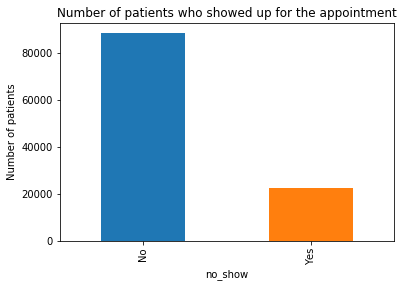

In [93]:
df['no_show'].value_counts().plot(kind='bar')
plt.title('Number of patients who showed up for the appointment')
plt.xlabel('no_show')
plt.ylabel('Number of patients');

In [65]:
#Percentage of Showed up patients
yes = df['no_show'].value_counts() [1]
no = df['no_show'].value_counts() [0]
percent = no/(yes+no)*100
print("percent=", percent)

percent= 79.8067440535


We see that almost 80% of the patients show up for the scheduled day.

### How many patients showed up with respect to the gender?

In [66]:
df.groupby('gender')['no_show'].count()

gender
F    71840
M    38687
Name: no_show, dtype: int64

In [67]:
print (len(df[df['gender']=='F']))
print (df.shape[0])

71840
110527


In [68]:
# Proportion of students that are female
(len(df[df['gender']=='F']))/df.shape[0]

0.6499769287142508

In [69]:

# Proportion of students that are female
(len(df[df['gender']=='M']))/df.shape[0]

0.35002307128574917

We see that about 65% of the patients are females 

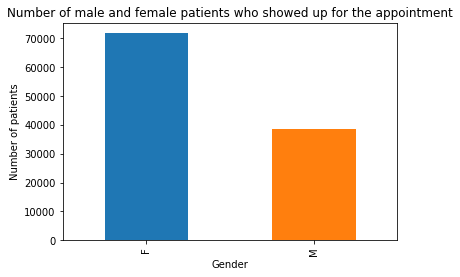

In [94]:
df['gender'].value_counts().plot(kind='bar')
plt.title('Number of male and female patients who showed up for the appointment')
plt.xlabel('Gender')
plt.ylabel('Number of patients');

### How many of them having/not having the scholorship showed up for the appointment?

In [71]:
# Lets check how many patients have the scholarship/ medical insurance 
df.groupby('scholarship')['no_show'].count()

scholarship
0    99666
1    10861
Name: no_show, dtype: int64

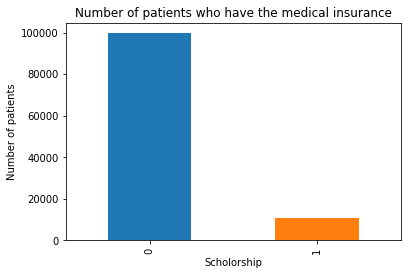

In [95]:
df['scholarship'].value_counts().plot(kind='bar')
plt.title('Number of patients who have the medical insurance')
plt.xlabel('Scholorship')
plt.ylabel('Number of patients');

We see that most of the patients with insurance claims showed up for the appointments and the remaining patients didnt, may be because of the financial crisis or large amount of money may be needed for any surgery or tests.

### How many female and male patients have scholarships for the treatment 

In [73]:
fem_scholarship = df.query("gender == 'F' & scholarship == 0 & no_show == 'No'").count()/(df.query("gender == 'F'").count())
print (fem_scholarship)

patient_id              0.702937
appointment_id          0.702937
gender                  0.702937
scheduled_day           0.702937
age                     0.702937
neighbourhood           0.702937
scholarship             0.702937
hypertension            0.702937
diabetes                0.702937
alcoholism              0.702937
handicap                0.702937
sms_received            0.702937
no_show                 0.702937
patient_id_converted    0.702937
dtype: float64


From the above results, Out of 71840 female patients, about 70% of the female patients with the scholorships showed up for the appointments.

In [74]:
male_scholarship = df.query("gender == 'M' & scholarship == 0 & no_show == 'No'").count()/(df.query("gender == 'M'").count())
print (male_scholarship)

patient_id              0.760617
appointment_id          0.760617
gender                  0.760617
scheduled_day           0.760617
age                     0.760617
neighbourhood           0.760617
scholarship             0.760617
hypertension            0.760617
diabetes                0.760617
alcoholism              0.760617
handicap                0.760617
sms_received            0.760617
no_show                 0.760617
patient_id_converted    0.760617
dtype: float64


From the above results, Out of 38687 male patients, about 76% of the male pateints with the scholorships showed up for the appointments.

### Top neighbourhood patients who showed up for the appointment?

In [129]:
df_neighbourhood = df.groupby([ 'neighbourhood', 'no_show'])['no_show'].count().sort_values(ascending=False).head(5)
df_neighbourhood

neighbourhood    no_show
JARDIM CAMBURI   No         6252
MARIA ORTIZ      No         4586
RESISTÊNCIA      No         3525
JARDIM DA PENHA  No         3246
SANTA MARTHA     No         2635
Name: no_show, dtype: int64

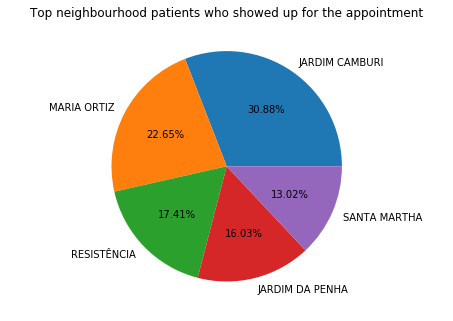

In [127]:
fig = plt.figure()
ax = fig.add_axes([0,0,1,1])
ax.axis('equal')
labels = ['JARDIM CAMBURI', 'MARIA ORTIZ', 'RESISTÊNCIA', 'JARDIM DA PENHA', 'SANTA MARTHA']
plt.title("Top neighbourhood patients who showed up for the appointment");
ax.pie(df_neighbourhood,labels = labels, autopct='%1.2f%%');

###  What is the age group of people who showed up for the appointment?

In [77]:
def age_group(df_age):
    bin_edges = [-1, 18, 30, 60, float('inf')] # Fill in this list with five values you just found
    bin_names = [ 'child','younger adults' ,'adults' ,'senior adults' ] # Name each acidity level category
    # Creates age_group column
    #df['age_group'] = pd.cut(df['age'], bin_edges, labels=bin_names)
    result = pd.cut([df_age], bin_edges, labels=bin_names)
    return result[0]
    #return df['age_group']
    

In [80]:
df["age_group"] = df.age.apply(age_group)

In [81]:
df.head()

,patient_id,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,patient_id_converted,age_group
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No,29872499824296,senior adults
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No,558997776694438,adults
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,62,MATA DA PRAIA,0,0,0,0,0,0,No,4262962299951,senior adults
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,867951213174,child
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No,8841186448183,adults


In [82]:
# check for any null or nan values in the age_group column
df[df["age_group"].isnull().values]

,patient_id,appointment_id,gender,scheduled_day,age,neighbourhood,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,no_show,patient_id_converted,age_group
99832,4.659432e+14,5775010,F,2016-06-06T08:58:13Z,-1,ROMÃO,0,0,0,0,0,0,No,465943158731293,NaN


In [83]:
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,patient_id_converted
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,1.105270e+05
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026,1.474963e+14
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873,2.560949e+14
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.921800e+04
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.172614e+12
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.173184e+13
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.439172e+13
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,9.999816e+14


In [84]:
# We can see that the age column has a negative value which is an outlier. We can drop the outlier row.
index = df[(df['age'] <= -1)].index
df.drop(index, inplace=True)

In [85]:
# check if the outlier is dropped
df.describe()

,patient_id,appointment_id,age,scholarship,hypertension,diabetes,alcoholism,handicap,sms_received,patient_id_converted
count,1.105260e+05,1.105260e+05,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,110526.000000,1.105260e+05
mean,1.474934e+14,5.675304e+06,37.089219,0.098266,0.197248,0.071865,0.030400,0.022248,0.321029,1.474934e+14
std,2.560943e+14,7.129544e+04,23.110026,0.297676,0.397923,0.258266,0.171686,0.161543,0.466874,2.560943e+14
min,3.921784e+04,5.030230e+06,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.921800e+04
25%,4.172536e+12,5.640285e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.172536e+12
50%,3.173184e+13,5.680572e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.173184e+13
75%,9.438963e+13,5.725523e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,9.438963e+13
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000,9.999816e+14


In [86]:
df.groupby(['age_group', 'no_show'])['no_show'].count()

age_group       no_show
adults          No         36310
                Yes         8823
child           No         22519
                Yes         6347
senior adults   No         16756
                Yes         3006
younger adults  No         12622
                Yes         4143
Name: no_show, dtype: int64

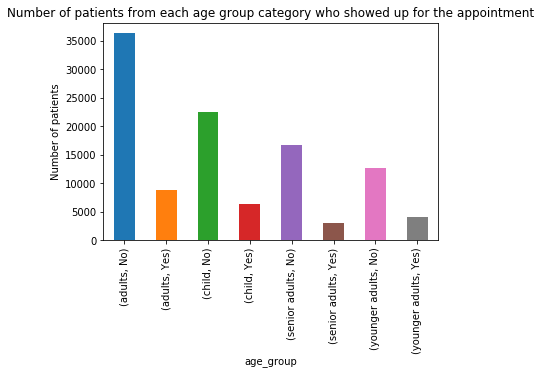

In [96]:
df.groupby(['age_group', 'no_show'])['no_show'].count().plot(kind = 'bar')
plt.title('Number of patients from each age group category who showed up for the appointment')
plt.xlabel('age_group')
plt.ylabel('Number of patients');

From the graph we see that patients between the age group of 30 and 60 years visited the hospital frequently for the scheduled day

### Who( male or females) are in more numbers with respect to the age group?

In [88]:
# without considering how many showed up for the appointments, I have counted how many male and females book the appointmemts.
df.groupby(['age_group', 'gender'])['gender'].count()

age_group       gender
adults          F         31194
                M         13939
child           F         14954
                M         13912
senior adults   F         13274
                M          6488
younger adults  F         12417
                M          4348
Name: gender, dtype: int64

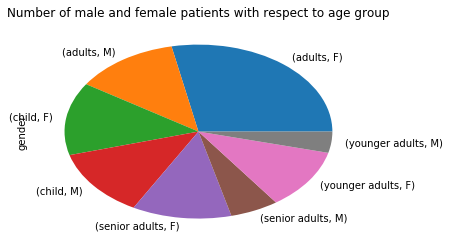

In [115]:
df.groupby(['age_group', 'gender'])['gender'].count().plot(kind = 'pie')
plt.title("Number of male and female patients with respect to age group");

We see that there are more female patients from all the age groups who showed up for the appointments compared to males.
Females between the age group of 30 and 60 are frequent patients compared to other age groups.

<a id='conclusions'></a>
## Conclusions
From the above analysis we can say that the numnber of patients with the medical appointments who showed up for the scheduled day are females. May be, females who are married and who have kids have medical issues compared to the men in Brazil or there may be any other reason due to age also.

From my point of view, the data provided was sufficient enough to do some detailed analysis but there is an exception in the analysis that I have made. The age and age group column has a constraint that any baby below 0 years are not categoried in the age group column. For example if a baby who is 9 months old is come for a check up, the age when converted to years gives a decimal number which is not right. So, this exception is not handled in my analysis. 


## Submitting your Project 

> Before you submit your project, you need to create a .html or .pdf version of this notebook in the workspace here. To do that, run the code cell below. If it worked correctly, you should get a return code of 0, and you should see the generated .html file in the workspace directory (click on the orange Jupyter icon in the upper left).

> Alternatively, you can download this report as .html via the **File** > **Download as** submenu, and then manually upload it into the workspace directory by clicking on the orange Jupyter icon in the upper left, then using the Upload button.

> Once you've done this, you can submit your project by clicking on the "Submit Project" button in the lower right here. This will create and submit a zip file with this .ipynb doc and the .html or .pdf version you created. Congratulations!

In [118]:
from subprocess import call
call(['python', '-m', 'nbconvert', 'Investigate_a_Dataset.ipynb'])

0